In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

data_path = "./../data/"

9


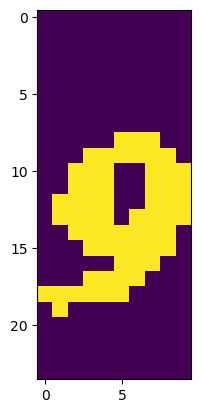

In [108]:

def make_contour_rects(data_path):
    all_imgs = []
    for image_name in os.listdir(data_path):
        img_path = data_path + image_name
        img = cv2.imread(img_path)
        _, thresholded = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY_INV)
        to_gray = cv2.cvtColor(thresholded, cv2.COLOR_BGR2GRAY)
        ctrs, _ = cv2.findContours(to_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        ctrs = np.asarray(ctrs, dtype=object)
        my_rects = np.asarray([cv2.boundingRect(ctr) for ctr in ctrs])

        while len(my_rects) != 4:
            big_ctr_ind = np.argmax(my_rects[:, 2])
            big_ctr = my_rects[big_ctr_ind]
            split_width = big_ctr[2]//2
            sub_rect_one = np.asarray([big_ctr[0], big_ctr[1], split_width, 0])
            sub_rect_two = np.asarray([big_ctr[0] + split_width, big_ctr[1], big_ctr[2] - split_width, 0])
            my_rects = np.concatenate((my_rects[:big_ctr_ind], np.asarray([sub_rect_one, sub_rect_two]), my_rects[big_ctr_ind + 1:]))
        
        
        assert(len(my_rects) == 4)
        my_rects = np.sort(my_rects, axis=0)        
        divided_img = []
        code = image_name.split(".")[0]
        for i, rect in enumerate(my_rects):
            new_image = to_gray[:,rect[0]:rect[0]+rect[2]] 
            divided_img.append((np.asarray(new_image), code[i]))
        
        all_imgs.append(divided_img)
    return all_imgs


result = make_contour_rects(data_path)
